<a href="https://colab.research.google.com/github/anniechen0506/Modeling-and-Optimization-Fall-2023/blob/main/Model_as_Profit_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Model as Profit Function

In [ ]:
def profit(fixed_cost = 750,
            sales_price = 18,
            variable_cost = 8,
            salvage_value = 6,
            demand = 1400,
            order = 1600):
  #quantity_calcs
  quantity_sold = min(demand, order)
  quantity_salvaged = order - quantity_sold
  #revenue calcs
  rev_sales = quantity_sold*sales_price
  rev_salvaged = quantity_salvaged*salvage_value
  total_rev = rev_sales + rev_salvaged
  #cost calculations
  total_cost = fixed_cost + variable_cost*order
  #profit
  profit = total_rev - total_cost
  return profit

profit()

12850

#Prompt 3
Simulate the profit distribution under the following random inputs:
- Demand ~ Poisson(lam = 1200)
- Variable Cost ~ Lognormal(mean = 2.3, sigma = .1)
- Salvage Value ~ (Variable Cost)*B, where B ~ Beta(a = 10, b = 50)
- Sales Price ~ (Variable Cost) + M, where M ~ Normal(mean= 5, stdev=3)

Plot a histogram of the projected profit under an order quantity of 1400 and fixed cost of 750. What's the predicted probability of a negative profit?

If you're unfamiliar with these types of distributions, it may also be helpful to plot a histogram of the inputs to help understand what kind of uncertainty you are considering for the inputs, too.

---



In [ ]:
import numpy as np

num_sim = 10000
sim_demands = np.random.poisson(lam = 1200, size = num_sim)
sim_variable_costs = np.random.lognormal(mean = 2.3, sigma = .1, size = num_sim)
B = np.random.beta(a = 10, b = 50, size = num_sim)
sim_salvage_values = sim_variable_costs*B
sim_sales_prices = sim_variable_costs + np.random.normal(5,3,num_sim)

(array([   3.,   44.,  250., 1198., 2341., 2966., 2125.,  832.,  211.,
          30.]),
 array([-11562.94775297,  -8753.61498608,  -5944.2822192 ,  -3134.94945232,
          -325.61668544,   2483.71608144,   5293.04884832,   8102.3816152 ,
         10911.71438208,  13721.04714896,  16530.37991584]),
 <BarContainer object of 10 artists>)

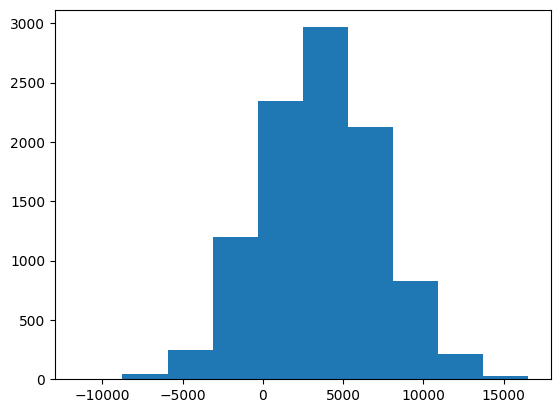

In [ ]:
import matplotlib.pyplot as plt

sim_profits = [profit(demand = sim_demands[i],
                      order = 1400,
                      fixed_cost = 750,
                      variable_cost = sim_variable_costs[i],
                      salvage_value = sim_salvage_values[i],
                      sales_price = sim_sales_prices[i]) for i in range(num_sim)]
plt.hist(sim_profits)

#Prompt 4:
Models are also useful for making calculations/projections for existing datasets (not just simulated datasets). For example, consider this dataset of input values for a portfolio of 100 products. Use the model to project the profit for all 100 products. Return to your boss a .csv file where you have added the projected profit for all 100 products, and sorted them from best to worst in terms of projected profit. Can you also include a scatterplot of demand versus profit?

In [ ]:
#first you have to put the .csv file into colab by dragging it into the folder tab on the left pane...
import pandas as pd
products = pd.read_csv("03_sync_products.csv")
products

,Unnamed: 0,prod_id,fixed_cost,variable_cost,sales_price,salvage_value,demand,order
0,0,0,756.0,6.99,15.47,5.34,1886.0,1809.0
1,1,1,702.0,4.93,15.40,4.10,2015.0,2318.0
2,2,2,683.0,8.60,20.04,5.40,3534.0,3576.0
3,3,3,746.0,9.49,17.91,4.79,2614.0,2600.0
4,4,4,806.0,6.73,13.02,-0.74,2496.0,2465.0
...,...,...,...,...,...,...,...,...
95,95,95,915.0,6.85,18.84,4.87,1647.0,1636.0
96,96,96,673.0,10.35,19.07,3.47,1551.0,1603.0
97,97,97,624.0,11.05,19.31,3.12,2051.0,2397.0
98,98,98,857.0,10.78,20.57,5.74,1875.0,1954.0


In [ ]:
fixed_cost = products["fixed_cost"]
variable_cost = products["variable_cost"]
sales_price = products["sales_price"]
salvage_value = products["salvage_value"]
demand = products["demand"]
order = products["order"]

profits = [profit(fixed_cost = fixed_cost[i],
                          sales_price = sales_price[i],
                          variable_cost = variable_cost[i],
                          salvage_value = salvage_value[i],
                          demand = demand[i],
                          order = order[i]) for i in range(100)]

products["profits"] = profits
products

products.sort_values(by = "profits", ascending = False)

In [ ]:
sorted_products = products.sort_values(by = "profits", ascending = False)
sorted_products.to_csv("sorted_products.csv")

In [ ]:
products.plot.scatter("demand","profits")

##Prompt 4 using Panda's "apply" function

We can accomplish the same task using panda's built in "apply" function. The syntax is a little hard to remember (I always have to Google or use ChatGPT to do this), but intuitively it is simply applying the "profit" function we defined earlier to each row.

In [ ]:
products = pd.read_csv("03_sync_products.csv")
products

In [ ]:
products['profits'] = products.apply(lambda row: profit(fixed_cost=row['fixed_cost'],
                                           sales_price=row['sales_price'],
                                           variable_cost=row['variable_cost'],
                                           salvage_value=row['salvage_value'],
                                           demand=row['demand'],
                                           order=row['order']), axis=1)
products

In [ ]:
products.sort_values(by = "profits", ascending = False)